In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/YOLO8

/content/drive/MyDrive/YOLO8


In [3]:
!pip install ultralytics


In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

!pip install Ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu121


In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())


True
1



0: 640x640 (no detections), 21.3ms
Speed: 1.9ms preprocess, 21.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


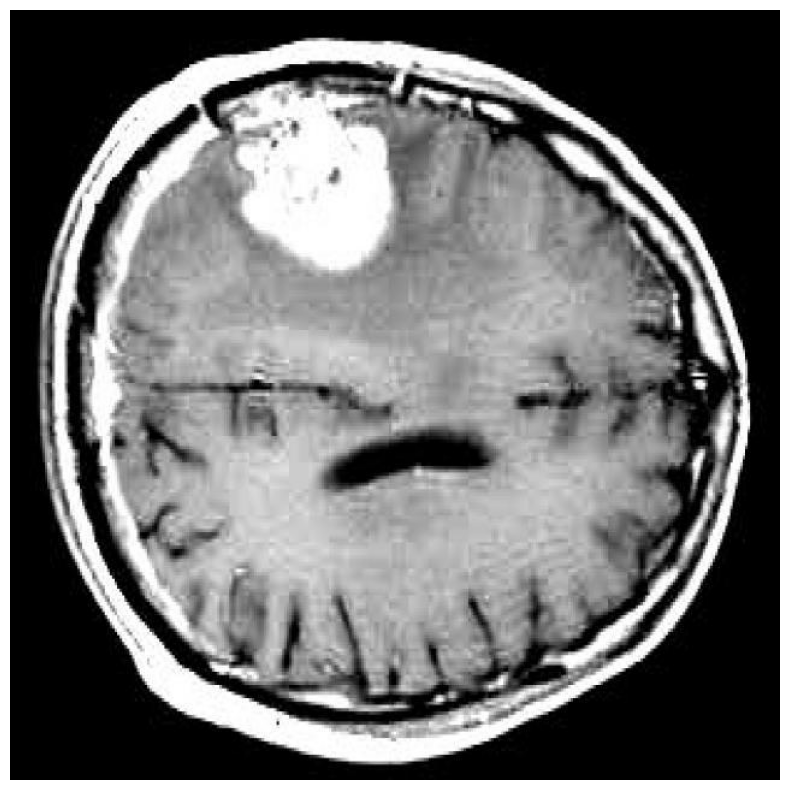

In [15]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 segmentation model
model = YOLO("yolo11n-seg.pt")  # Replace with your model path if custom

# Load the image
image_path = "/content/drive/MyDrive/YOLO8/train/images/y2_jpg.rf.4fccb062e795c542b7b80a0699808aab.jpg"  # Path to your uploaded image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform segmentation
results = model.predict(source=image, show=False, save=False, conf=0.5)  # Set confidence threshold as needed

# Visualize results
annotated_image = results[0].plot()  # Annotated image with segmentation masks and labels

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

In [17]:
results = model.predict(source=image, task="segment", conf=0.25, save=False)



0: 640x640 (no detections), 21.5ms
Speed: 2.8ms preprocess, 21.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
print(results[0])


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [19]:
for result in results:
    # Check if any detections were made
    if result.boxes is not None:
        for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
            print(f"Bounding Box: {box}, Confidence: {conf:.2f}, Class ID: {int(cls)}")

    # Check if any masks were generated
    if result.masks is not None:
        for seg in result.masks.data:
            print(f"Mask Shape: {seg.shape}")
    else:
        print("No segmentation masks found.")


No segmentation masks found.


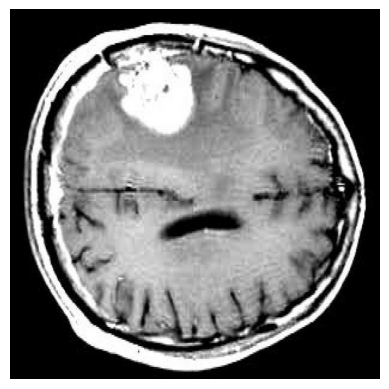

In [20]:
annotated_image = results[0].plot()  # Annotate the image with masks and boxes
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


In [21]:
annotated_image = results[0].plot()
cv2.imwrite("annotated_image.png", cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


True

In [22]:
%cd /content/drive/MyDrive/YOLO11-Instance-Segmentation-main

/content/drive/MyDrive/YOLO11-Instance-Segmentation-main



0: 640x640 (no detections), 18.3ms
Speed: 1.9ms preprocess, 18.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


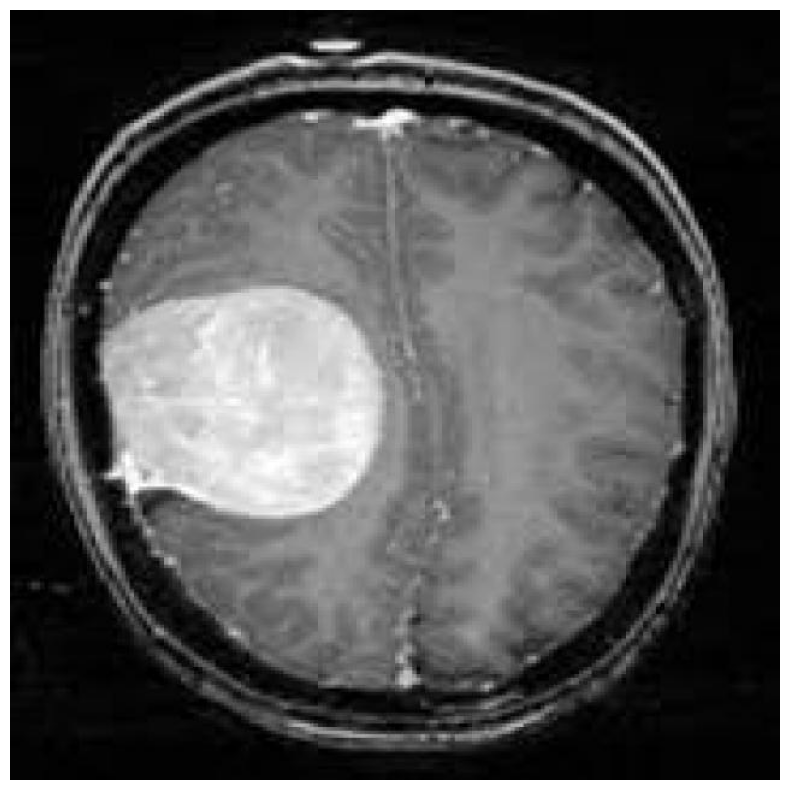

AttributeError: 'NoneType' object has no attribute 'data'

In [27]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 segmentation model
model = YOLO("yolo11n-seg.pt")  # Replace with your model path if custom

# Load the image
image_path = "/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/test_images/1.jpg"  # Replace with the path to your uploaded image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform instance segmentation
results = model.predict(source=image, task="segment", conf=0.5, save=False)  # Set confidence threshold as needed

# Visualize the results
annotated_image = results[0].plot()  # Annotated image with segmentation masks and labels

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


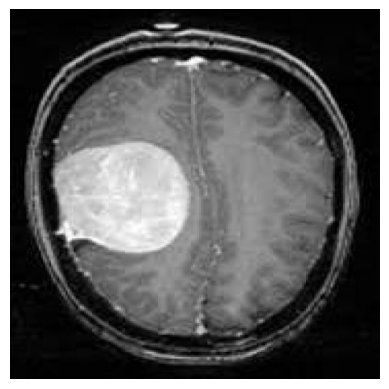

In [28]:
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


In [29]:
!nvidia-smi

Thu Jan  2 18:40:14 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0              31W /  70W |    285MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [30]:
!pip install ultralytics

In [31]:
from ultralytics import YOLO

In [32]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [33]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:15<00:00, 105.84it/s]


In [36]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/train/labels... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:07<00:00, 73.05it/s] 


train: New cache created: /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/valid/labels... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:02<00:00, 48.19it/s]


val: New cache created: /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/valid/labels.cache
Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.99G      1.102       2.55      3.102      1.338          7        640: 100%|██████████| 37/37 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        126          1      0.217      0.701      0.466          1      0.217      0.717       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.95G      1.111       1.92      2.129      1.279          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all        123        126      0.751      0.597      0.744      0.438      0.761      0.605      0.759      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.95G      1.134      1.815      1.781      1.273          7        640: 100%|██████████| 37/37 [00:17<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        123        126      0.714      0.563      0.669      0.389      0.696      0.548      0.621      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.95G      1.096      1.775       1.58      1.275          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        123        126      0.752      0.747      0.804       0.55      0.817       0.64      0.689      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.95G      1.054      1.661      1.282      1.208          7        640: 100%|██████████| 37/37 [00:18<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        123        126      0.919      0.895      0.946       0.66      0.919      0.895      0.905      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.95G     0.9678      1.595      1.096      1.151          8        640: 100%|██████████| 37/37 [00:17<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        126      0.913       0.92      0.947      0.685      0.921      0.928      0.968      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G      0.939      1.525     0.9663      1.144          8        640: 100%|██████████| 37/37 [00:18<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        123        126      0.958      0.915      0.972      0.718      0.958      0.915      0.972       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.95G     0.8839      1.415     0.8495      1.122          7        640: 100%|██████████| 37/37 [00:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        123        126      0.982       0.96      0.983       0.75      0.982       0.96      0.989      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.95G     0.8647      1.361     0.7883      1.083          8        640: 100%|██████████| 37/37 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        123        126      0.984      0.984      0.985      0.748      0.984      0.984      0.985      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.95G     0.7789      1.269     0.7348      1.054          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        123        126      0.982      0.976      0.986      0.769      0.982      0.976      0.986      0.757



10 epochs completed in 0.063 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.0MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


                   all        123        126      0.982      0.976      0.986      0.769      0.982      0.976      0.986      0.757
Speed: 0.4ms preprocess, 5.7ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/segment/train3


In [37]:
from IPython.display import Image